TP3 - Clustering et Word2vec
-Traitement automatique de corpus-
Sylviane Van Rymenant

Décennie choisie : 1940's

PARTIE 1 : Clustering

In [1]:
#Import
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

import nltk

nltk.download('punkt')

data_path = "../data/txt/"

#Choix d'une décennie
DECADE = '1940'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

texts = [open(data_path + f,encoding='utf-8').read() for f in files]

#Vectoriser les documents
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

#Instancier le modèle TF-IDF avec ses arguments

vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

#construire la matrice des vecteurs à l'aide de la fonction fit_transform

tfidf_vectors = vectorizer.fit_transform(texts)

# Détail de la matrice
tfidf_vectors.shape

(1000, 4622)

In [23]:
#Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

N_CLUSTERS = 4

#Instancier le modèle K-Means et ses arguments

km_model = KMeans(n_clusters=N_CLUSTERS)

#Appliquer le clustering à l'aide de la fonction fit_predict

clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

pprint(dict(clustering))



{0: ['KB_JB838_1940-01-07_01-00014.txt',
     'KB_JB838_1940-04-17_01-00012.txt',
     'KB_JB838_1940-05-09_01-00010.txt',
     'KB_JB838_1940-09-08_01-00011.txt',
     'KB_JB838_1940-09-18_01-00007.txt',
     'KB_JB838_1940-11-21_01-00011.txt',
     'KB_JB838_1941-04-17_01-00011.txt',
     'KB_JB838_1941-04-18_01-00007.txt',
     'KB_JB838_1941-04-26_01-00013.txt',
     'KB_JB838_1941-08-12_01-00007.txt',
     'KB_JB838_1941-08-22_01-00007.txt',
     'KB_JB838_1941-09-15_01-00007.txt',
     'KB_JB838_1946-03-08_01-00007.txt',
     'KB_JB838_1946-03-27_01-00007.txt',
     'KB_JB838_1946-04-13_01-00008.txt',
     'KB_JB838_1946-04-19_01-00009.txt',
     'KB_JB838_1946-05-18_01-00008.txt',
     'KB_JB838_1946-05-25_01-00010.txt',
     'KB_JB838_1946-05-26_01-00011.txt',
     'KB_JB838_1946-07-20_01-00010.txt',
     'KB_JB838_1946-10-13_01-00015.txt',
     'KB_JB838_1946-11-16_01-00009.txt',
     'KB_JB838_1946-11-20_01-00012.txt',
     'KB_JB838_1947-01-03_01-00010.txt',
     'KB_JB838_1

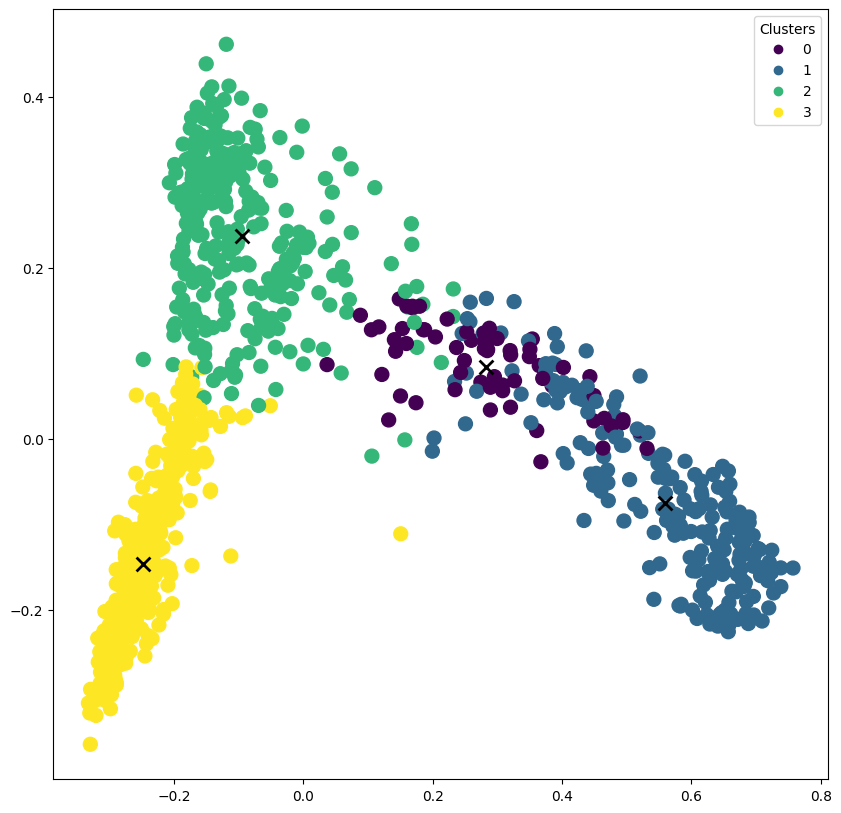

In [24]:
#Visualiser les clusters

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

#reduced_vectors[:10]

#Générer le plot

x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

Analyse des clusters obtenus

Keywords du Cluster 3

In [1]:
#Cluster 3
import os
import yake

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [15]:
#Cluster 3
# Lister les Fichiers
data_path = "../data/txt/"
files = 'KB_JB838_1940-01-04_01-00001.txt','KB_JB838_1940-01-10_01-00003.txt','KB_JB838_1940-01-11_01-00004.txt','KB_JB838_1940-01-27_01-00004.txt','KB_JB838_1940-01-31_01-00002.txt','KB_JB838_1940-02-07_01-00004.txt','KB_JB838_1940-02-25_01-00006.txt','KB_JB838_1940-02-29_01-00005.txt','KB_JB838_1940-03-01_01-00003.txt','KB_JB838_1940-03-03_01-00004.txt','KB_JB838_1940-03-10_01-00003.txt','KB_JB838_1940-03-31_01-00002.txt','KB_JB838_1940-04-16_01-00003.txt','KB_JB838_1940-04-19_01-00004.txt','KB_JB838_1940-04-29_01-00001.txt','KB_JB838_1940-05-02_01-00002.txt','KB_JB838_1940-05-02_01-00004.txt','KB_JB838_1940-06-19_01-00002.txt','KB_JB838_1940-06-21_01-00003.txt','KB_JB838_1940-07-11_01-00001.txt','KB_JB838_1940-07-16_01-00001.txt','KB_JB838_1940-07-24_01-00001.txt','KB_JB838_1940-08-03_01-00001.txt','KB_JB838_1940-08-11_01-00002.txt','KB_JB838_1940-08-29_01-00003.txt','KB_JB838_1940-08-31_01-00002.txt','KB_JB838_1940-09-14_01-00001.txt','KB_JB838_1940-09-26_01-00006.txt','KB_JB838_1940-09-28_01-00002.txt','KB_JB838_1940-10-01_01-00003.txt','KB_JB838_1940-10-03_01-00002.txt','KB_JB838_1940-10-08_01-00004.txt','KB_JB838_1940-10-10_01-00002.txt','KB_JB838_1940-10-15_01-00004.txt','KB_JB838_1940-10-17_01-00009.txt','KB_JB838_1940-11-01_01-00004.txt','KB_JB838_1940-11-09_01-00002.txt','KB_JB838_1940-12-05_01-00001.txt','KB_JB838_1940-12-07_01-00012.txt','KB_JB838_1940-12-18_01-00002.txt','KB_JB838_1940-12-18_01-00008.txt','KB_JB838_1940-12-31_01-00005.txt','KB_JB838_1940-12-31_01-00011.txt','KB_JB838_1941-01-08_01-00003.txt','KB_JB838_1941-01-11_01-00003.txt','KB_JB838_1941-01-27_01-00001.txt','KB_JB838_1941-01-29_01-00002.txt','KB_JB838_1941-02-06_01-00003.txt','KB_JB838_1941-02-08_01-00012.txt','KB_JB838_1941-02-18_01-00003.txt','KB_JB838_1941-03-18_01-00006.txt','KB_JB838_1941-03-20_01-00002.txt','KB_JB838_1941-03-24_01-00003.txt','KB_JB838_1941-03-28_01-00003.txt','KB_JB838_1941-04-01_01-00003.txt','KB_JB838_1941-04-03_01-00012.txt','KB_JB838_1941-04-08_01-00010.txt','KB_JB838_1941-04-10_01-00002.txt','KB_JB838_1941-04-21_01-00002.txt','KB_JB838_1941-04-26_01-00002.txt','KB_JB838_1941-04-28_01-00001.txt','KB_JB838_1941-04-29_01-00002.txt','KB_JB838_1941-05-01_01-00002.txt','KB_JB838_1941-05-08_01-00005.txt','KB_JB838_1941-05-15_01-00002.txt','KB_JB838_1941-05-17_01-00003.txt','KB_JB838_1941-05-19_01-00001.txt','KB_JB838_1941-05-19_01-00003.txt','KB_JB838_1941-05-26_01-00002.txt','KB_JB838_1941-07-09_01-00001.txt','KB_JB838_1941-07-19_01-00002.txt','KB_JB838_1941-07-26_01-00004.txt','KB_JB838_1941-07-31_01-00002.txt','KB_JB838_1941-08-06_01-00001.txt','KB_JB838_1941-08-09_01-00005.txt','KB_JB838_1941-08-30_01-00002.txt','KB_JB838_1941-09-01_01-00001.txt','KB_JB838_1941-09-01_01-00002.txt','KB_JB838_1941-09-06_01-00001.txt','KB_JB838_1941-09-19_01-00003.txt','KB_JB838_1941-09-30_01-00001.txt','KB_JB838_1941-10-02_01-00001.txt','KB_JB838_1941-10-11_01-00002.txt','KB_JB838_1941-10-17_01-00001.txt','KB_JB838_1941-10-27_01-00003.txt','KB_JB838_1941-11-05_01-00001.txt','KB_JB838_1941-11-22_01-00001.txt','KB_JB838_1942-01-08_01-00001.txt','KB_JB838_1942-01-21_01-00003.txt','KB_JB838_1942-01-27_01-00003.txt','KB_JB838_1942-01-28_01-00003.txt','KB_JB838_1942-02-02_01-00001.txt','KB_JB838_1942-02-06_01-00001.txt','KB_JB838_1942-02-09_01-00001.txt','KB_JB838_1942-02-19_01-00003.txt','KB_JB838_1942-03-09_01-00001.txt','KB_JB838_1942-03-17_01-00003.txt','KB_JB838_1942-03-24_01-00003.txt','KB_JB838_1942-03-25_01-00003.txt','KB_JB838_1942-03-28_01-00003.txt','KB_JB838_1942-03-30_01-00001.txt','KB_JB838_1942-04-08_01-00003.txt','KB_JB838_1942-04-13_01-00001.txt','KB_JB838_1942-04-17_01-00001.txt','KB_JB838_1942-04-17_01-00003.txt','KB_JB838_1942-04-30_01-00003.txt','KB_JB838_1942-05-02_01-00002.txt','KB_JB838_1942-05-07_01-00001.txt','KB_JB838_1942-05-20_01-00003.txt','KB_JB838_1942-06-06_01-00001.txt','KB_JB838_1942-06-11_01-00003.txt','KB_JB838_1942-06-13_01-00001.txt','KB_JB838_1942-06-30_01-00003.txt','KB_JB838_1942-07-01_01-00001.txt','KB_JB838_1942-07-07_01-00003.txt','KB_JB838_1942-07-10_01-00001.txt','KB_JB838_1942-07-14_01-00001.txt','KB_JB838_1942-07-23_01-00001.txt','KB_JB838_1942-08-01_01-00001.txt','KB_JB838_1942-08-21_01-00001.txt','KB_JB838_1942-08-22_01-00002.txt','KB_JB838_1942-09-23_01-00001.txt','KB_JB838_1942-09-29_01-00001.txt','KB_JB838_1942-10-05_01-00001.txt','KB_JB838_1942-10-10_01-00002.txt','KB_JB838_1942-10-26_01-00001.txt','KB_JB838_1942-10-30_01-00001.txt','KB_JB838_1942-11-10_01-00001.txt','KB_JB838_1942-11-13_01-00001.txt','KB_JB838_1942-11-16_01-00001.txt','KB_JB838_1942-11-21_01-00001.txt','KB_JB838_1942-12-28_01-00001.txt','KB_JB838_1943-01-18_01-00001.txt','KB_JB838_1943-01-18_01-00003.txt','KB_JB838_1943-01-30_01-00001.txt','KB_JB838_1943-02-09_01-00001.txt','KB_JB838_1943-02-15_01-00001.txt','KB_JB838_1943-03-01_01-00001.txt','KB_JB838_1943-03-09_01-00001.txt','KB_JB838_1943-03-19_01-00001.txt','KB_JB838_1943-03-26_01-00001.txt','KB_JB838_1943-04-03_01-00001.txt','KB_JB838_1943-04-17_01-00001.txt','KB_JB838_1943-04-29_01-00001.txt','KB_JB838_1943-05-12_01-00001.txt','KB_JB838_1943-05-20_01-00001.txt','KB_JB838_1943-05-26_01-00001.txt','KB_JB838_1943-05-28_01-00001.txt','KB_JB838_1943-05-29_01-00001.txt','KB_JB838_1943-06-08_01-00001.txt','KB_JB838_1943-06-09_01-00001.txt','KB_JB838_1943-07-03_01-00002.txt','KB_JB838_1943-07-08_01-00001.txt','KB_JB838_1943-07-17_01-00002.txt','KB_JB838_1943-07-24_01-00002.txt','KB_JB838_1943-07-27_01-00001.txt','KB_JB838_1943-08-21_01-00002.txt','KB_JB838_1943-08-28_01-00002.txt','KB_JB838_1943-09-06_01-00002.txt','KB_JB838_1943-09-13_01-00001.txt','KB_JB838_1943-09-20_01-00002.txt','KB_JB838_1943-09-23_01-00001.txt','KB_JB838_1943-10-06_01-00002.txt','KB_JB838_1943-10-16_01-00001.txt','KB_JB838_1943-10-22_01-00001.txt','KB_JB838_1943-10-25_01-00001.txt','KB_JB838_1943-11-12_01-00001.txt','KB_JB838_1943-11-17_01-00002.txt','KB_JB838_1943-12-06_01-00001.txt','KB_JB838_1943-12-13_01-00001.txt','KB_JB838_1943-12-24_01-00002.txt','KB_JB838_1943-12-29_01-00001.txt','KB_JB838_1943-12-31_01-00001.txt','KB_JB838_1944-01-05_01-00001.txt','KB_JB838_1944-01-07_01-00001.txt','KB_JB838_1944-01-11_01-00001.txt','KB_JB838_1944-01-19_01-00001.txt','KB_JB838_1944-01-25_01-00001.txt','KB_JB838_1944-02-05_01-00001.txt','KB_JB838_1944-02-05_01-00002.txt','KB_JB838_1944-02-08_01-00001.txt','KB_JB838_1944-02-09_01-00002.txt','KB_JB838_1944-02-10_01-00001.txt','KB_JB838_1944-02-12_01-00001.txt','KB_JB838_1944-02-18_01-00001.txt','KB_JB838_1944-03-10_01-00001.txt','KB_JB838_1944-03-14_01-00001.txt','KB_JB838_1944-03-15_01-00001.txt','KB_JB838_1944-03-28_01-00001.txt','KB_JB838_1944-03-29_01-00001.txt','KB_JB838_1944-04-15_01-00001.txt','KB_JB838_1944-04-17_01-00002.txt','KB_JB838_1944-04-24_01-00001.txt','KB_JB838_1944-05-01_01-00001.txt','KB_JB838_1944-05-09_01-00001.txt','KB_JB838_1944-05-19_01-00001.txt','KB_JB838_1944-05-24_01-00001.txt','KB_JB838_1944-05-26_01-00001.txt','KB_JB838_1944-06-03_01-00001.txt','KB_JB838_1944-06-14_01-00001.txt','KB_JB838_1944-06-16_01-00001.txt','KB_JB838_1944-06-23_01-00001.txt','KB_JB838_1944-07-15_01-00001.txt','KB_JB838_1944-07-18_01-00001.txt','KB_JB838_1944-07-24_01-00001.txt','KB_JB838_1944-07-27_01-00001.txt','KB_JB838_1944-07-29_01-00001.txt','KB_JB838_1944-08-08_01-00001.txt','KB_JB838_1944-08-14_01-00001.txt','KB_JB838_1944-08-21_01-00001.txt','KB_JB838_1944-08-24_01-00001.txt','KB_JB838_1944-09-13_01-00001.txt','KB_JB838_1944-09-14_01-00002.txt','KB_JB838_1944-09-21_01-00003.txt','KB_JB838_1944-09-29_01-00001.txt','KB_JB838_1944-10-03_01-00002.txt','KB_JB838_1944-10-06_01-00002.txt','KB_JB838_1944-10-11_01-00002.txt','KB_JB838_1944-10-18_01-00001.txt','KB_JB838_1944-10-28_01-00002.txt','KB_JB838_1944-10-29_01-00001.txt','KB_JB838_1944-10-31_01-00001.txt','KB_JB838_1944-11-03_01-00001.txt','KB_JB838_1944-11-18_01-00002.txt','KB_JB838_1944-11-19_01-00002.txt','KB_JB838_1944-12-19_01-00001.txt','KB_JB838_1944-12-30_01-00001.txt','KB_JB838_1945-01-13_01-00001.txt','KB_JB838_1945-03-23_01-00002.txt','KB_JB838_1945-04-10_02-00001.txt','KB_JB838_1945-04-14_01-00001.txt','KB_JB838_1945-04-14_02-00002.txt','KB_JB838_1945-04-19_02-00001.txt','KB_JB838_1945-05-05_02-00001.txt','KB_JB838_1945-05-07_01-00001.txt','KB_JB838_1945-05-12_01-00002.txt','KB_JB838_1945-06-01_02-00002.txt','KB_JB838_1945-06-05_01-00001.txt','KB_JB838_1945-06-08_03-00002.txt','KB_JB838_1945-06-14_03-00002.txt','KB_JB838_1945-06-20_03-00002.txt','KB_JB838_1945-06-21_01-00001.txt','KB_JB838_1945-06-21_03-00001.txt','KB_JB838_1945-06-28_01-00002.txt','KB_JB838_1945-06-30_01-00002.txt','KB_JB838_1945-07-02_01-00001.txt','KB_JB838_1945-07-03_01-00002.txt','KB_JB838_1945-07-07_01-00001.txt','KB_JB838_1945-07-14_01-00001.txt','KB_JB838_1945-07-24_01-00002.txt','KB_JB838_1945-07-29_01-00001.txt','KB_JB838_1945-08-01_02-00001.txt','KB_JB838_1945-08-04_01-00002.txt','KB_JB838_1945-08-05_01-00002.txt','KB_JB838_1945-08-09_01-00001.txt','KB_JB838_1945-08-15_03-00001.txt','KB_JB838_1945-08-26_01-00001.txt','KB_JB838_1945-08-31_03-00001.txt','KB_JB838_1945-09-05_01-00001.txt','KB_JB838_1945-09-06_01-00001.txt','KB_JB838_1945-09-12_03-00001.txt','KB_JB838_1945-09-25_02-00002.txt','KB_JB838_1945-10-14_01-00001.txt','KB_JB838_1945-10-21_01-00001.txt','KB_JB838_1945-10-25_02-00001.txt','KB_JB838_1945-10-30_03-00001.txt','KB_JB838_1945-11-04_03-00001.txt','KB_JB838_1945-11-14_02-00002.txt','KB_JB838_1945-11-16_02-00002.txt','KB_JB838_1945-11-17_02-00002.txt','KB_JB838_1945-11-23_03-00001.txt','KB_JB838_1945-11-30_02-00002.txt','KB_JB838_1945-12-07_01-00002.txt','KB_JB838_1945-12-08_01-00001.txt','KB_JB838_1945-12-09_01-00002.txt','KB_JB838_1945-12-14_03-00001.txt','KB_JB838_1945-12-22_01-00001.txt','KB_JB838_1945-12-24_02-00004.txt','KB_JB838_1945-12-28_01-00002.txt','KB_JB838_1945-12-29_01-00002.txt','KB_JB838_1945-12-30_03-00002.txt','KB_JB838_1946-01-06_01-00002.txt','KB_JB838_1946-01-30_01-00002.txt','KB_JB838_1946-02-01_01-00001.txt','KB_JB838_1946-02-24_01-00003.txt','KB_JB838_1946-03-06_01-00001.txt','KB_JB838_1946-03-11_01-00001.txt','KB_JB838_1946-04-17_01-00002.txt','KB_JB838_1946-05-07_01-00001.txt','KB_JB838_1946-05-24_01-00002.txt','KB_JB838_1946-05-29_01-00003.txt','KB_JB838_1946-06-08_01-00003.txt','KB_JB838_1946-06-23_01-00001.txt','KB_JB838_1946-07-02_01-00001.txt','KB_JB838_1946-07-09_01-00001.txt','KB_JB838_1946-07-09_01-00002.txt','KB_JB838_1946-07-12_01-00002.txt','KB_JB838_1946-07-16_01-00002.txt','KB_JB838_1946-08-03_01-00001.txt','KB_JB838_1946-08-07_01-00001.txt','KB_JB838_1946-08-14_01-00001.txt','KB_JB838_1946-08-15_01-00002.txt','KB_JB838_1946-08-20_01-00002.txt','KB_JB838_1946-08-22_01-00001.txt','KB_JB838_1946-09-01_01-00002.txt','KB_JB838_1946-09-11_01-00001.txt','KB_JB838_1946-09-18_01-00002.txt','KB_JB838_1946-09-26_01-00002.txt','KB_JB838_1946-10-03_01-00002.txt','KB_JB838_1946-10-03_01-00004.txt','KB_JB838_1946-10-09_01-00002.txt','KB_JB838_1946-11-03_01-00005.txt','KB_JB838_1946-11-07_01-00003.txt','KB_JB838_1946-11-16_01-00004.txt','KB_JB838_1946-11-17_01-00004.txt','KB_JB838_1946-12-07_01-00005.txt','KB_JB838_1946-12-10_01-00004.txt','KB_JB838_1946-12-11_01-00001.txt','KB_JB838_1946-12-12_01-00002.txt','KB_JB838_1946-12-28_01-00001.txt','KB_JB838_1947-01-14_01-00004.txt','KB_JB838_1947-01-15_01-00002.txt','KB_JB838_1947-01-16_01-00003.txt','KB_JB838_1947-01-17_01-00003.txt','KB_JB838_1947-01-17_01-00005.txt','KB_JB838_1947-01-24_01-00003.txt','KB_JB838_1947-02-09_01-00005.txt','KB_JB838_1947-03-06_01-00001.txt','KB_JB838_1947-03-20_01-00001.txt','KB_JB838_1947-03-21_01-00004.txt','KB_JB838_1947-03-25_01-00002.txt','KB_JB838_1947-03-27_01-00002.txt','KB_JB838_1947-05-04_01-00007.txt','KB_JB838_1947-05-12_01-00006.txt','KB_JB838_1947-05-14_01-00001.txt','KB_JB838_1947-05-16_01-00006.txt','KB_JB838_1947-05-18_01-00020.txt','KB_JB838_1947-05-25_01-00004.txt','KB_JB838_1947-06-04_01-00004.txt','KB_JB838_1947-06-17_01-00004.txt','KB_JB838_1947-06-18_01-00004.txt','KB_JB838_1947-07-05_01-00004.txt','KB_JB838_1947-07-16_01-00002.txt','KB_JB838_1947-08-24_01-00006.txt','KB_JB838_1947-08-25_01-00001.txt','KB_JB838_1947-09-10_01-00001.txt','KB_JB838_1947-09-17_01-00001.txt','KB_JB838_1947-10-07_01-00007.txt','KB_JB838_1947-10-09_01-00001.txt','KB_JB838_1947-10-12_01-00007.txt','KB_JB838_1947-10-15_01-00002.txt','KB_JB838_1947-10-25_01-00002.txt','KB_JB838_1947-10-30_01-00003.txt','KB_JB838_1947-11-03_01-00004.txt','KB_JB838_1947-11-08_01-00005.txt','KB_JB838_1947-12-01_01-00001.txt','KB_JB838_1947-12-07_01-00001.txt','KB_JB838_1947-12-14_01-00002.txt','KB_JB838_1947-12-25_01-00002.txt','KB_JB838_1948-01-24_01-00003.txt','KB_JB838_1948-01-27_01-00003.txt','KB_JB838_1948-02-01_01-00002.txt','KB_JB838_1948-02-03_01-00005.txt','KB_JB838_1948-02-25_01-00002.txt','KB_JB838_1948-02-27_01-00003.txt','KB_JB838_1948-03-21_01-00009.txt','KB_JB838_1948-03-22_01-00006.txt','KB_JB838_1948-04-09_01-00004.txt','KB_JB838_1948-04-11_01-00009.txt','KB_JB838_1948-05-26_01-00002.txt','KB_JB838_1948-06-08_01-00002.txt','KB_JB838_1948-06-16_01-00005.txt','KB_JB838_1948-06-17_01-00002.txt','KB_JB838_1948-06-23_01-00001.txt','KB_JB838_1948-06-27_01-00007.txt','KB_JB838_1948-08-11_01-00003.txt','KB_JB838_1948-08-16_01-00002.txt','KB_JB838_1948-08-28_01-00004.txt','KB_JB838_1948-09-16_01-00003.txt','KB_JB838_1948-09-23_01-00005.txt','KB_JB838_1948-09-26_01-00001.txt','KB_JB838_1948-09-26_01-00008.txt','KB_JB838_1948-10-21_01-00005.txt','KB_JB838_1948-11-06_01-00001.txt','KB_JB838_1948-11-10_01-00003.txt','KB_JB838_1948-11-11_01-00004.txt','KB_JB838_1948-11-13_01-00001.txt','KB_JB838_1948-11-15_01-00001.txt','KB_JB838_1948-11-19_01-00001.txt','KB_JB838_1948-11-19_01-00005.txt','KB_JB838_1948-12-02_01-00002.txt','KB_JB838_1948-12-04_01-00006.txt','KB_JB838_1948-12-07_01-00001.txt','KB_JB838_1948-12-21_01-00001.txt','KB_JB838_1948-12-23_01-00001.txt','KB_JB838_1948-12-26_01-00001.txt','KB_JB838_1948-12-28_01-00005.txt','KB_JB838_1948-12-29_01-00001.txt','KB_JB838_1949-01-03_01-00001.txt','KB_JB838_1949-01-13_01-00002.txt','KB_JB838_1949-01-22_01-00007.txt','KB_JB838_1949-01-27_01-00005.txt','KB_JB838_1949-02-05_01-00005.txt','KB_JB838_1949-02-24_01-00005.txt','KB_JB838_1949-02-28_01-00001.txt','KB_JB838_1949-03-05_01-00001.txt','KB_JB838_1949-03-19_01-00007.txt','KB_JB838_1949-04-05_01-00002.txt','KB_JB838_1949-04-06_01-00005.txt','KB_JB838_1949-04-17_01-00002.txt','KB_JB838_1949-04-24_01-00003.txt','KB_JB838_1949-05-03_01-00002.txt','KB_JB838_1949-05-08_01-00005.txt','KB_JB838_1949-05-19_01-00002.txt','KB_JB838_1949-05-24_01-00003.txt','KB_JB838_1949-05-28_01-00005.txt','KB_JB838_1949-05-29_01-00006.txt','KB_JB838_1949-06-02_01-00005.txt','KB_JB838_1949-06-12_01-00018.txt','KB_JB838_1949-06-14_01-00004.txt','KB_JB838_1949-06-21_01-00003.txt','KB_JB838_1949-07-09_01-00003.txt','KB_JB838_1949-07-13_01-00004.txt','KB_JB838_1949-07-16_01-00001.txt','KB_JB838_1949-07-18_01-00001.txt','KB_JB838_1949-07-19_01-00001.txt','KB_JB838_1949-08-11_01-00004.txt','KB_JB838_1949-08-21_01-00005.txt','KB_JB838_1949-11-11_01-00014.txt','KB_JB838_1949-11-23_01-00002.txt','KB_JB838_1949-11-29_01-00001.txt','KB_JB838_1949-12-03_01-00006.txt','KB_JB838_1949-12-06_01-00001.txt','KB_JB838_1949-12-10_01-00001.txt','KB_JB838_1949-12-16_01-00005.txt','KB_JB838_1949-12-20_01-00004.txt','KB_JB838_1949-12-23_01-00006.txt'



In [5]:
#Cluster 3
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1940-01-04_01-00001.txt mentions these keywords: nous avons, nous dit-on, qu’il nous, nous qu’il, nous faut, milieux politiques, foi nous, C’est qu’il, ROYALE BRUXELLES...
KB_JB838_1940-01-10_01-00003.txt mentions these keywords: gouvernement finlandais, presse soviétique, division soviétique, janvier Havas, DERNIERES NOUVELLES, navires britanniques, troupes russes, guerre italien, troupes finlandaises...
KB_JB838_1940-01-11_01-00004.txt mentions these keywords: forces aériennes, United Press, Conseil général, France Londres, comte Csaky, comte Ciano, Tribunal correctionnel, Air Force, Conseil communal, Mardi soir...
KB_JB838_1940-01-27_01-00004.txt mentions these keywords: Affaires étrangères, Myron Taylor, Défense nationale, Londres LONDRES, affaires économiques, André SIEGFRIED...
KB_JB838_1940-01-31_01-00002.txt mentions these keywords: van Kleffens, BON D’ACHAT, Conseil communal, Maison Van, général Weygand, d’une marine, Comité belge, Maison Fran...
KB_JB838_1940-02-07_0

Keywords du Cluster 1

In [6]:
#Cluster 1
import os
import yake

# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [7]:
#Cluster 1
# Lister les Fichiers
data_path = "../data/txt/"
files = 'KB_JB838_1940-01-05_01-00009.txt','KB_JB838_1940-02-05_01-00008.txt','KB_JB838_1940-03-02_01-00009.txt','KB_JB838_1940-03-03_01-00012.txt','KB_JB838_1940-03-25_01-00007.txt','KB_JB838_1940-06-29_01-00007.txt','KB_JB838_1940-07-30_01-00007.txt','KB_JB838_1940-08-06_01-00007.txt','KB_JB838_1940-09-29_01-00009.txt','KB_JB838_1940-10-09_01-00008.txt','KB_JB838_1940-10-25_01-00008.txt','KB_JB838_1940-11-17_01-00010.txt','KB_JB838_1940-12-05_01-00007.txt','KB_JB838_1941-01-17_01-00006.txt','KB_JB838_1941-01-25_01-00010.txt','KB_JB838_1941-02-04_01-00008.txt','KB_JB838_1941-03-28_01-00006.txt','KB_JB838_1941-04-17_01-00008.txt','KB_JB838_1941-04-21_01-00007.txt','KB_JB838_1941-04-29_01-00007.txt','KB_JB838_1941-05-07_01-00005.txt','KB_JB838_1941-06-14_01-00010.txt','KB_JB838_1941-07-16_01-00006.txt','KB_JB838_1941-08-16_01-00008.txt','KB_JB838_1941-09-15_01-00007.txt','KB_JB838_1941-09-19_01-00004.txt','KB_JB838_1941-09-28_01-00005.txt','KB_JB838_1941-11-26_01-00005.txt','KB_JB838_1941-12-16_01-00005.txt','KB_JB838_1942-01-15_01-00005.txt','KB_JB838_1942-01-23_01-00005.txt','KB_JB838_1942-01-27_01-00005.txt','KB_JB838_1942-02-02_01-00005.txt','KB_JB838_1942-03-02_01-00005.txt','KB_JB838_1942-03-31_01-00005.txt','KB_JB838_1942-04-01_01-00004.txt','KB_JB838_1942-04-07_01-00005.txt','KB_JB838_1942-06-01_01-00004.txt','KB_JB838_1942-06-09_01-00004.txt','KB_JB838_1942-06-11_01-00005.txt','KB_JB838_1942-06-17_01-00005.txt','KB_JB838_1942-06-24_01-00003.txt','KB_JB838_1942-07-22_01-00004.txt','KB_JB838_1942-08-06_01-00004.txt','KB_JB838_1942-08-12_01-00004.txt','KB_JB838_1942-08-13_01-00004.txt','KB_JB838_1942-12-07_01-00004.txt','KB_JB838_1943-01-25_01-00004.txt','KB_JB838_1943-02-03_01-00004.txt','KB_JB838_1943-06-09_01-00004.txt','KB_JB838_1943-06-21_01-00004.txt','KB_JB838_1943-06-23_01-00004.txt','KB_JB838_1943-07-26_01-00004.txt','KB_JB838_1943-09-20_01-00004.txt','KB_JB838_1943-09-27_01-00004.txt','KB_JB838_1943-10-13_01-00004.txt','KB_JB838_1943-11-10_01-00004.txt','KB_JB838_1944-01-05_01-00004.txt','KB_JB838_1944-02-21_01-00004.txt','KB_JB838_1944-04-17_01-00004.txt','KB_JB838_1944-05-23_01-00002.txt','KB_JB838_1944-05-31_01-00002.txt','KB_JB838_1944-06-01_01-00002.txt','KB_JB838_1944-06-28_01-00002.txt','KB_JB838_1944-07-10_01-00002.txt','KB_JB838_1944-08-11_01-00002.txt','KB_JB838_1944-08-16_01-00002.txt','KB_JB838_1944-10-07_01-00002.txt','KB_JB838_1944-10-22_01-00004.txt','KB_JB838_1944-10-29_01-00003.txt','KB_JB838_1944-10-29_01-00004.txt','KB_JB838_1944-11-05_01-00004.txt','KB_JB838_1944-11-10_01-00003.txt','KB_JB838_1944-11-14_01-00004.txt','KB_JB838_1944-11-19_01-00004.txt','KB_JB838_1944-11-28_01-00002.txt','KB_JB838_1945-01-06_01-00004.txt','KB_JB838_1945-04-02_01-00003.txt','KB_JB838_1945-04-17_02-00003.txt','KB_JB838_1945-04-30_01-00003.txt','KB_JB838_1945-05-02_02-00003.txt','KB_JB838_1945-05-09_02-00003.txt','KB_JB838_1945-05-21_01-00003.txt','KB_JB838_1945-06-10_01-00003.txt','KB_JB838_1945-07-01_02-00003.txt','KB_JB838_1945-07-12_01-00003.txt','KB_JB838_1945-08-02_01-00003.txt','KB_JB838_1945-08-03_01-00003.txt','KB_JB838_1945-08-09_02-00003.txt','KB_JB838_1945-08-24_03-00002.txt','KB_JB838_1945-08-28_01-00002.txt','KB_JB838_1945-08-29_02-00002.txt','KB_JB838_1945-08-29_03-00002.txt','KB_JB838_1945-09-06_03-00002.txt','KB_JB838_1945-09-11_01-00002.txt','KB_JB838_1945-09-19_02-00002.txt','KB_JB838_1945-09-21_02-00002.txt','KB_JB838_1945-09-25_02-00004.txt','KB_JB838_1945-09-27_02-00003.txt','KB_JB838_1945-10-09_01-00004.txt','KB_JB838_1945-10-18_03-00003.txt','KB_JB838_1945-10-19_01-00003.txt','KB_JB838_1945-10-27_03-00002.txt','KB_JB838_1945-11-07_01-00004.txt','KB_JB838_1945-11-24_03-00004.txt','KB_JB838_1945-12-19_02-00004.txt','KB_JB838_1945-12-19_03-00004.txt','KB_JB838_1945-12-20_03-00005.txt','KB_JB838_1945-12-22_02-00004.txt','KB_JB838_1945-12-22_03-00004.txt','KB_JB838_1946-01-12_01-00006.txt','KB_JB838_1946-01-22_01-00005.txt','KB_JB838_1946-01-23_01-00006.txt','KB_JB838_1946-01-31_01-00005.txt','KB_JB838_1946-03-20_01-00007.txt','KB_JB838_1946-03-24_01-00008.txt','KB_JB838_1946-03-27_01-00007.txt','KB_JB838_1946-05-09_01-00005.txt','KB_JB838_1946-06-04_01-00007.txt','KB_JB838_1946-06-23_01-00010.txt','KB_JB838_1946-08-25_01-00011.txt','KB_JB838_1946-09-10_01-00008.txt','KB_JB838_1946-09-22_01-00010.txt','KB_JB838_1946-10-15_01-00009.txt','KB_JB838_1946-10-16_01-00006.txt','KB_JB838_1946-10-24_01-00007.txt','KB_JB838_1946-11-16_01-00009.txt','KB_JB838_1946-11-22_01-00009.txt','KB_JB838_1946-11-28_01-00007.txt','KB_JB838_1946-11-28_01-00011.txt','KB_JB838_1947-02-08_01-00012.txt','KB_JB838_1947-02-09_01-00013.txt','KB_JB838_1947-02-16_01-00014.txt','KB_JB838_1947-04-01_01-00010.txt','KB_JB838_1947-04-17_01-00008.txt','KB_JB838_1947-04-22_01-00009.txt','KB_JB838_1947-04-26_01-00009.txt','KB_JB838_1947-05-08_01-00010.txt','KB_JB838_1947-05-09_01-00009.txt','KB_JB838_1947-05-13_01-00010.txt','KB_JB838_1947-06-20_01-00010.txt','KB_JB838_1947-06-28_01-00009.txt','KB_JB838_1947-07-29_01-00009.txt','KB_JB838_1947-08-12_01-00008.txt','KB_JB838_1947-08-21_01-00009.txt','KB_JB838_1947-09-13_01-00010.txt','KB_JB838_1947-09-21_01-00015.txt','KB_JB838_1947-10-17_01-00009.txt','KB_JB838_1947-10-24_01-00010.txt','KB_JB838_1947-11-16_01-00013.txt','KB_JB838_1947-12-21_01-00015.txt','KB_JB838_1947-12-30_01-00010.txt','KB_JB838_1947-12-31_01-00008.txt','KB_JB838_1948-01-20_01-00011.txt','KB_JB838_1948-01-29_01-00010.txt','KB_JB838_1948-02-21_01-00010.txt','KB_JB838_1948-03-06_01-00011.txt','KB_JB838_1948-03-09_01-00010.txt','KB_JB838_1948-06-03_01-00010.txt','KB_JB838_1948-06-10_01-00010.txt','KB_JB838_1948-06-17_01-00010.txt','KB_JB838_1948-07-23_01-00009.txt','KB_JB838_1948-08-08_01-00013.txt','KB_JB838_1948-09-16_01-00012.txt','KB_JB838_1948-10-05_01-00012.txt','KB_JB838_1948-11-06_01-00013.txt','KB_JB838_1948-11-09_01-00010.txt','KB_JB838_1948-11-10_01-00009.txt','KB_JB838_1948-12-04_01-00012.txt','KB_JB838_1948-12-08_01-00012.txt','KB_JB838_1948-12-19_01-00018.txt','KB_JB838_1949-01-06_01-00012.txt','KB_JB838_1949-01-18_01-00008.txt','KB_JB838_1949-02-11_01-00009.txt','KB_JB838_1949-02-19_01-00010.txt','KB_JB838_1949-02-19_01-00012.txt','KB_JB838_1949-03-01_01-00009.txt','KB_JB838_1949-03-19_01-00012.txt','KB_JB838_1949-03-23_01-00009.txt','KB_JB838_1949-04-01_01-00010.txt','KB_JB838_1949-04-02_01-00014.txt','KB_JB838_1949-05-12_01-00010.txt','KB_JB838_1949-05-29_01-00013.txt','KB_JB838_1949-08-07_01-00012.txt','KB_JB838_1949-11-22_01-00012.txt','KB_JB838_1949-12-08_01-00011.txt','KB_JB838_1949-12-10_01-00015.txt','KB_JB838_1949-12-24_01-00011.txt'

In [8]:
#Cluster 1
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1940-01-05_01-00009.txt mentions these keywords: Agence Rossel, JNE FILLE, l’Agence Rossel, TAVERNE Dem, bon. référ, rue Washington, Ecrire AGENCE...
KB_JB838_1940-02-05_01-00008.txt mentions these keywords: AGENCE ROSSEL, Ecrire Agence, PAGES Fils, Spéciaux Londres, EDITION PARUE, DERNIERE EDITION, Faire offre, bon état, rue Royale...
KB_JB838_1940-03-02_01-00009.txt mentions these keywords: Agence Rossel, Blanco Sol, Dick Gale, prix mod, l’AOENCE ROSSEL, rue Washington...
KB_JB838_1940-03-03_01-00012.txt mentions these keywords: Agence Rossel, cherche place, Ecrire Agence, Ecrire ROSSEL, l’AGENCE ROSSEL, Prix mod...
KB_JB838_1940-03-25_01-00007.txt mentions these keywords: Concert donné, Programme varié, Journal parlé, Disques demandés, Jim Lash, Concert varié, concert d’orgue, AGENCE ROSSEL, Disques variés, concert Germaine, Musique enregistrée, Dlck Gale...
KB_JB838_1940-06-29_01-00007.txt mentions these keywords: Agence ROSSEL, cherche place, territoires occupés, Ecrire A

Keywords du cluster 0

In [9]:
#Cluster 0
# Lister les Fichiers
data_path = "../data/txt/"
files ='KB_JB838_1940-01-07_01-00014.txt','KB_JB838_1940-02-18_01-00014.txt','KB_JB838_1940-02-25_01-00011.txt','KB_JB838_1940-02-29_01-00008.txt','KB_JB838_1940-03-10_01-00010.txt','KB_JB838_1940-03-22_01-00009.txt','KB_JB838_1940-04-07_01-00008.txt','KB_JB838_1940-04-16_01-00008.txt','KB_JB838_1940-04-17_01-00012.txt','KB_JB838_1940-05-09_01-00010.txt','KB_JB838_1940-08-25_01-00005.txt','KB_JB838_1940-09-08_01-00011.txt','KB_JB838_1940-09-18_01-00007.txt','KB_JB838_1940-11-01_01-00007.txt','KB_JB838_1940-11-03_01-00008.txt','KB_JB838_1940-11-10_01-00008.txt','KB_JB838_1940-11-21_01-00011.txt','KB_JB838_1940-12-28_01-00007.txt','KB_JB838_1941-01-18_01-00008.txt','KB_JB838_1941-01-21_01-00007.txt','KB_JB838_1941-04-05_01-00007.txt','KB_JB838_1941-04-05_01-00008.txt','KB_JB838_1941-04-08_01-00007.txt','KB_JB838_1941-04-17_01-00011.txt','KB_JB838_1941-04-18_01-00007.txt','KB_JB838_1941-04-26_01-00013.txt','KB_JB838_1941-05-17_01-00010.txt','KB_JB838_1941-05-28_01-00007.txt','KB_JB838_1941-08-12_01-00007.txt','KB_JB838_1941-08-22_01-00007.txt','KB_JB838_1941-11-26_01-00004.txt','KB_JB838_1941-12-20_01-00004.txt','KB_JB838_1942-01-10_01-00005.txt','KB_JB838_1942-04-07_01-00004.txt','KB_JB838_1942-05-16_01-00004.txt','KB_JB838_1942-06-13_01-00005.txt','KB_JB838_1942-09-19_01-00004.txt','KB_JB838_1943-02-20_01-00004.txt','KB_JB838_1943-03-06_01-00004.txt','KB_JB838_1943-06-19_01-00004.txt','KB_JB838_1943-10-02_01-00004.txt','KB_JB838_1943-11-13_01-00004.txt','KB_JB838_1944-01-10_01-00004.txt','KB_JB838_1944-04-26_01-00002.txt','KB_JB838_1944-04-29_01-00002.txt','KB_JB838_1944-05-06_01-00002.txt','KB_JB838_1944-05-12_01-00002.txt','KB_JB838_1944-06-07_01-00002.txt','KB_JB838_1944-06-10_01-00002.txt','KB_JB838_1944-06-24_01-00002.txt','KB_JB838_1944-07-28_01-00002.txt','KB_JB838_1944-07-29_01-00002.txt','KB_JB838_1944-08-12_01-00002.txt','KB_JB838_1945-07-15_03-00003.txt','KB_JB838_1945-07-22_01-00003.txt','KB_JB838_1945-10-21_03-00003.txt','KB_JB838_1945-11-18_02-00003.txt','KB_JB838_1945-12-09_02-00005.txt','KB_JB838_1945-12-12_01-00003.txt','KB_JB838_1945-12-30_02-00004.txt','KB_JB838_1945-12-30_03-00004.txt','KB_JB838_1946-03-08_01-00007.txt','KB_JB838_1946-04-13_01-00008.txt','KB_JB838_1946-04-19_01-00009.txt','KB_JB838_1946-05-05_01-00006.txt','KB_JB838_1946-05-18_01-00008.txt','KB_JB838_1946-05-19_01-00008.txt','KB_JB838_1946-05-25_01-00010.txt','KB_JB838_1946-05-26_01-00011.txt','KB_JB838_1946-06-26_01-00005.txt','KB_JB838_1946-07-14_01-00007.txt','KB_JB838_1946-07-20_01-00010.txt','KB_JB838_1946-09-08_01-00009.txt','KB_JB838_1946-09-15_01-00007.txt','KB_JB838_1946-10-13_01-00015.txt','KB_JB838_1946-11-09_01-00005.txt','KB_JB838_1946-11-16_01-00006.txt','KB_JB838_1946-11-20_01-00012.txt','KB_JB838_1946-12-08_01-00010.txt','KB_JB838_1947-01-03_01-00010.txt','KB_JB838_1947-01-23_01-00012.txt','KB_JB838_1947-02-09_01-00016.txt','KB_JB838_1947-02-28_01-00008.txt','KB_JB838_1947-03-07_01-00014.txt','KB_JB838_1947-03-14_01-00013.txt','KB_JB838_1947-04-09_01-00011.txt','KB_JB838_1947-06-01_01-00016.txt','KB_JB838_1947-06-11_01-00012.txt','KB_JB838_1947-06-21_01-00012.txt','KB_JB838_1947-08-08_01-00008.txt','KB_JB838_1947-08-29_01-00007.txt','KB_JB838_1947-09-04_01-00012.txt','KB_JB838_1947-09-06_01-00012.txt','KB_JB838_1947-10-05_01-00011.txt','KB_JB838_1947-10-30_01-00012.txt','KB_JB838_1947-12-14_01-00016.txt','KB_JB838_1947-12-17_01-00014.txt','KB_JB838_1947-12-24_01-00012.txt','KB_JB838_1948-01-22_01-00014.txt','KB_JB838_1948-02-07_01-00012.txt','KB_JB838_1948-02-10_01-00006.txt','KB_JB838_1948-03-06_01-00008.txt','KB_JB838_1948-03-20_01-00009.txt','KB_JB838_1948-04-18_01-00012.txt','KB_JB838_1948-05-08_01-00010.txt','KB_JB838_1948-05-25_01-00012.txt','KB_JB838_1948-06-05_01-00014.txt','KB_JB838_1948-06-27_01-00011.txt','KB_JB838_1948-06-29_01-00008.txt','KB_JB838_1948-07-03_01-00009.txt','KB_JB838_1948-09-05_01-00018.txt','KB_JB838_1948-09-26_01-00018.txt','KB_JB838_1948-09-29_01-00011.txt','KB_JB838_1948-10-02_01-00017.txt','KB_JB838_1948-10-07_01-00010.txt','KB_JB838_1948-10-23_01-00008.txt','KB_JB838_1948-10-26_01-00012.txt','KB_JB838_1948-10-28_01-00010.txt','KB_JB838_1948-12-22_01-00014.txt','KB_JB838_1948-12-23_01-00012.txt','KB_JB838_1949-01-11_01-00008.txt','KB_JB838_1949-01-23_01-00020.txt','KB_JB838_1949-03-09_01-00016.txt','KB_JB838_1949-04-05_01-00011.txt','KB_JB838_1949-05-13_01-00013.txt','KB_JB838_1949-05-21_01-00010.txt','KB_JB838_1949-06-04_01-00016.txt','KB_JB838_1949-07-03_01-00011.txt','KB_JB838_1949-07-06_01-00012.txt','KB_JB838_1949-07-09_01-00014.txt','KB_JB838_1949-07-24_01-00013.txt','KB_JB838_1949-08-28_01-00013.txt','KB_JB838_1949-11-10_01-00009.txt','KB_JB838_1949-11-13_01-00010.txt','KB_JB838_1949-11-25_01-00013.txt','KB_JB838_1949-12-08_01-00016.txt','KB_JB838_1949-12-10_01-00016.txt','KB_JB838_1949-12-21_01-00010.txt','KB_JB838_1949-12-28_01-00010.txt'

In [10]:
#Cluster 0
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1940-01-07_01-00014.txt mentions these keywords: POINTS NOIRS, Reproduction Interdite, rue Van, Camionnette Chevrolet, Création Paquln, POCHE EXTERIEURE, MILTON AUTOS, BRUXELLES Rue...
KB_JB838_1940-02-18_01-00014.txt mentions these keywords: Points noirs, Point gauffré, AGENCE ROSSEL, Blouse tricot, tricot noir...
KB_JB838_1940-02-25_01-00011.txt mentions these keywords: Vente publique, RUE ROYALE, belle table, Louer Maison, EXPOSITION PUBLIQUE, belle maison, BEAUX MEUBLES, Belle salle, Bruxelles Tél, louer belle, Tapis d’Orient, Objets d’Art, louer Jolie...
KB_JB838_1940-02-29_01-00008.txt mentions these keywords: Programme varié, Journal parlé, Concert varié, Musique enregistrée, belle maison, Concert donné, jeune homme, louer maison, grand jardin, jeune fille, varié habituel...
KB_JB838_1940-03-10_01-00010.txt mentions these keywords: VENTE PUBLIQUE, Louis XVI, dit notaire, Louis XIV, Blanco Sol, Dick Gale, Bruxelles Vente, bonne MAISON, dit Belding, dit Ladd, notaire vend

Keywords Cluster 2

In [11]:
#Cluster 2
# Lister les Fichiers
data_path = "../data/txt/"
files ='KB_JB838_1940-01-19_01-00005.txt','KB_JB838_1940-02-01_01-00006.txt','KB_JB838_1940-02-06_01-00005.txt','KB_JB838_1940-02-07_01-00005.txt','KB_JB838_1940-02-09_01-00005.txt','KB_JB838_1940-02-12_01-00005.txt','KB_JB838_1940-02-20_01-00007.txt','KB_JB838_1940-03-02_01-00007.txt','KB_JB838_1940-03-04_01-00005.txt','KB_JB838_1940-03-10_01-00008.txt','KB_JB838_1940-04-03_01-00007.txt','KB_JB838_1940-04-22_01-00005.txt','KB_JB838_1940-06-30_01-00005.txt','KB_JB838_1940-07-21_01-00005.txt','KB_JB838_1940-07-22_01-00006.txt','KB_JB838_1940-07-24_01-00005.txt','KB_JB838_1940-07-31_01-00005.txt','KB_JB838_1940-08-02_01-00004.txt','KB_JB838_1940-10-08_01-00005.txt','KB_JB838_1940-10-29_01-00006.txt','KB_JB838_1940-11-05_01-00005.txt','KB_JB838_1940-11-07_01-00005.txt','KB_JB838_1940-11-13_01-00006.txt','KB_JB838_1940-12-09_01-00004.txt','KB_JB838_1940-12-11_01-00008.txt','KB_JB838_1940-12-27_01-00006.txt','KB_JB838_1941-01-02_01-00005.txt','KB_JB838_1941-01-28_01-00005.txt','KB_JB838_1941-02-21_01-00004.txt','KB_JB838_1941-02-25_01-00004.txt','KB_JB838_1941-03-15_01-00005.txt','KB_JB838_1941-03-17_01-00006.txt','KB_JB838_1941-03-19_01-00004.txt','KB_JB838_1941-04-04_01-00008.txt','KB_JB838_1941-05-01_01-00008.txt','KB_JB838_1941-06-04_01-00008.txt','KB_JB838_1941-06-23_01-00004.txt','KB_JB838_1941-06-26_01-00008.txt','KB_JB838_1941-07-17_01-00004.txt','KB_JB838_1941-07-17_01-00008.txt','KB_JB838_1941-07-18_01-00004.txt','KB_JB838_1941-07-18_01-00006.txt','KB_JB838_1941-08-12_01-00008.txt','KB_JB838_1941-08-28_01-00008.txt','KB_JB838_1941-09-19_01-00002.txt','KB_JB838_1941-09-22_01-00006.txt','KB_JB838_1941-10-14_01-00002.txt','KB_JB838_1941-10-20_01-00002.txt','KB_JB838_1941-11-08_01-00002.txt','KB_JB838_1941-12-01_01-00002.txt','KB_JB838_1941-12-16_01-00002.txt','KB_JB838_1941-12-30_01-00006.txt','KB_JB838_1942-01-19_01-00002.txt','KB_JB838_1942-01-20_01-00006.txt','KB_JB838_1942-01-26_01-00002.txt','KB_JB838_1942-03-05_01-00006.txt','KB_JB838_1942-03-12_01-00002.txt','KB_JB838_1942-03-19_01-00006.txt','KB_JB838_1942-04-03_01-00006.txt','KB_JB838_1942-04-08_01-00006.txt','KB_JB838_1942-04-15_01-00002.txt','KB_JB838_1942-04-15_01-00006.txt','KB_JB838_1942-04-16_01-00006.txt','KB_JB838_1942-04-27_01-00006.txt','KB_JB838_1942-06-03_01-00002.txt','KB_JB838_1942-06-23_01-00002.txt','KB_JB838_1942-06-23_01-00006.txt','KB_JB838_1942-06-26_01-00006.txt','KB_JB838_1942-06-30_01-00002.txt','KB_JB838_1942-07-03_01-00002.txt','KB_JB838_1942-07-08_01-00006.txt','KB_JB838_1942-07-28_01-00002.txt','KB_JB838_1942-08-01_01-00003.txt','KB_JB838_1942-09-14_01-00003.txt','KB_JB838_1942-09-24_01-00002.txt','KB_JB838_1942-09-30_01-00003.txt','KB_JB838_1942-10-13_01-00002.txt','KB_JB838_1942-10-14_01-00003.txt','KB_JB838_1942-10-17_01-00003.txt','KB_JB838_1942-11-03_01-00002.txt','KB_JB838_1942-12-07_01-00002.txt','KB_JB838_1942-12-14_01-00003.txt','KB_JB838_1942-12-16_01-00002.txt','KB_JB838_1942-12-23_01-00003.txt','KB_JB838_1943-01-09_01-00003.txt','KB_JB838_1943-01-25_01-00002.txt','KB_JB838_1943-01-28_01-00002.txt','KB_JB838_1943-01-30_01-00003.txt','KB_JB838_1943-02-03_01-00002.txt','KB_JB838_1943-02-09_01-00002.txt','KB_JB838_1943-02-22_01-00003.txt','KB_JB838_1943-02-23_01-00002.txt','KB_JB838_1943-03-10_01-00003.txt','KB_JB838_1943-03-13_01-00003.txt','KB_JB838_1943-03-18_01-00002.txt','KB_JB838_1943-03-31_01-00002.txt','KB_JB838_1943-04-07_01-00002.txt','KB_JB838_1943-04-12_01-00003.txt','KB_JB838_1943-05-01_01-00003.txt','KB_JB838_1943-05-03_01-00002.txt','KB_JB838_1943-05-06_01-00002.txt','KB_JB838_1943-05-26_01-00003.txt','KB_JB838_1943-06-12_01-00003.txt','KB_JB838_1943-07-07_01-00003.txt','KB_JB838_1943-07-16_01-00002.txt','KB_JB838_1943-07-22_01-00002.txt','KB_JB838_1943-07-28_01-00003.txt','KB_JB838_1943-07-30_01-00002.txt','KB_JB838_1943-08-05_01-00002.txt','KB_JB838_1943-08-14_01-00003.txt','KB_JB838_1943-08-23_01-00003.txt','KB_JB838_1943-08-28_01-00003.txt','KB_JB838_1943-09-06_01-00003.txt','KB_JB838_1943-09-07_01-00002.txt','KB_JB838_1943-09-15_01-00003.txt','KB_JB838_1943-09-16_01-00002.txt','KB_JB838_1943-10-13_01-00003.txt','KB_JB838_1943-10-15_01-00002.txt','KB_JB838_1943-10-29_01-00002.txt','KB_JB838_1943-11-03_01-00003.txt','KB_JB838_1943-11-05_01-00002.txt','KB_JB838_1943-11-12_01-00002.txt','KB_JB838_1943-11-22_01-00002.txt','KB_JB838_1943-11-22_01-00003.txt','KB_JB838_1943-12-01_01-00003.txt','KB_JB838_1943-12-10_01-00002.txt','KB_JB838_1943-12-13_01-00003.txt','KB_JB838_1943-12-29_01-00003.txt','KB_JB838_1944-01-04_01-00002.txt','KB_JB838_1944-01-20_01-00002.txt','KB_JB838_1944-01-21_01-00002.txt','KB_JB838_1944-01-29_01-00003.txt','KB_JB838_1944-02-05_01-00003.txt','KB_JB838_1944-02-14_01-00003.txt','KB_JB838_1944-02-18_01-00002.txt','KB_JB838_1944-02-24_01-00003.txt','KB_JB838_1944-02-28_01-00002.txt','KB_JB838_1944-03-03_01-00003.txt','KB_JB838_1944-03-24_01-00002.txt','KB_JB838_1944-03-30_01-00002.txt','KB_JB838_1944-04-04_01-00002.txt','KB_JB838_1944-04-18_01-00002.txt','KB_JB838_1944-04-24_01-00003.txt','KB_JB838_1944-12-23_01-00003.txt','KB_JB838_1945-04-03_01-00002.txt','KB_JB838_1945-06-22_01-00002.txt','KB_JB838_1945-06-27_01-00002.txt','KB_JB838_1945-12-08_03-00003.txt','KB_JB838_1946-01-19_01-00003.txt','KB_JB838_1946-01-25_01-00003.txt','KB_JB838_1946-02-18_01-00003.txt','KB_JB838_1946-03-18_01-00003.txt','KB_JB838_1946-04-27_01-00004.txt','KB_JB838_1946-05-09_01-00004.txt','KB_JB838_1946-05-15_01-00004.txt','KB_JB838_1946-05-18_01-00004.txt','KB_JB838_1946-06-10_01-00003.txt','KB_JB838_1946-06-12_01-00005.txt','KB_JB838_1946-06-21_01-00006.txt','KB_JB838_1946-06-26_01-00004.txt','KB_JB838_1946-06-30_01-00005.txt','KB_JB838_1946-07-25_01-00004.txt','KB_JB838_1946-07-28_01-00005.txt','KB_JB838_1946-08-07_01-00005.txt','KB_JB838_1946-08-13_01-00005.txt','KB_JB838_1946-08-17_01-00005.txt','KB_JB838_1946-09-11_01-00005.txt','KB_JB838_1946-10-10_01-00006.txt','KB_JB838_1946-10-19_01-00006.txt','KB_JB838_1946-11-30_01-00005.txt','KB_JB838_1946-12-09_01-00006.txt','KB_JB838_1947-01-21_01-00006.txt','KB_JB838_1947-02-03_01-00004.txt','KB_JB838_1947-02-18_01-00006.txt','KB_JB838_1947-02-26_01-00007.txt','KB_JB838_1947-03-05_01-00006.txt','KB_JB838_1947-03-07_01-00008.txt','KB_JB838_1947-03-10_01-00005.txt','KB_JB838_1947-03-12_01-00007.txt','KB_JB838_1947-04-03_01-00005.txt','KB_JB838_1947-04-06_01-00006.txt','KB_JB838_1947-04-28_01-00005.txt','KB_JB838_1947-05-06_01-00005.txt','KB_JB838_1947-06-28_01-00006.txt','KB_JB838_1947-07-06_01-00006.txt','KB_JB838_1947-08-01_01-00005.txt','KB_JB838_1947-08-14_01-00005.txt','KB_JB838_1947-11-02_01-00002.txt','KB_JB838_1947-12-07_01-00008.txt','KB_JB838_1947-12-30_01-00006.txt','KB_JB838_1948-01-10_01-00007.txt','KB_JB838_1948-02-12_01-00008.txt','KB_JB838_1948-03-19_01-00007.txt','KB_JB838_1948-03-30_01-00002.txt','KB_JB838_1948-04-18_01-00009.txt','KB_JB838_1948-04-20_01-00007.txt','KB_JB838_1948-04-24_01-00008.txt','KB_JB838_1948-04-26_01-00003.txt','KB_JB838_1948-04-28_01-00006.txt','KB_JB838_1948-05-15_01-00006.txt','KB_JB838_1948-06-02_01-00007.txt','KB_JB838_1948-07-08_01-00007.txt','KB_JB838_1948-07-10_01-00006.txt','KB_JB838_1948-08-31_01-00005.txt','KB_JB838_1948-09-22_01-00006.txt','KB_JB838_1948-09-25_01-00008.txt','KB_JB838_1948-10-10_01-00006.txt','KB_JB838_1948-11-06_01-00016.txt','KB_JB838_1948-11-19_01-00008.txt','KB_JB838_1948-12-06_01-00005.txt','KB_JB838_1948-12-25_01-00011.txt','KB_JB838_1949-01-19_01-00006.txt','KB_JB838_1949-02-06_01-00006.txt','KB_JB838_1949-02-07_01-00003.txt','KB_JB838_1949-02-27_01-00008.txt','KB_JB838_1949-03-07_01-00004.txt','KB_JB838_1949-03-14_01-00004.txt','KB_JB838_1949-03-18_01-00006.txt','KB_JB838_1949-04-01_01-00008.txt','KB_JB838_1949-04-11_01-00004.txt','KB_JB838_1949-04-27_01-00007.txt','KB_JB838_1949-04-29_01-00008.txt','KB_JB838_1949-05-11_01-00006.txt','KB_JB838_1949-05-12_01-00006.txt','KB_JB838_1949-05-20_01-00008.txt','KB_JB838_1949-05-29_01-00007.txt','KB_JB838_1949-06-26_01-00006.txt','KB_JB838_1949-07-02_01-00008.txt','KB_JB838_1949-07-04_01-00004.txt','KB_JB838_1949-07-20_01-00007.txt','KB_JB838_1949-07-22_01-00006.txt','KB_JB838_1949-08-27_01-00006.txt','KB_JB838_1949-11-30_01-00006.txt','KB_JB838_1949-12-08_01-00007.txt','KB_JB838_1949-12-11_01-00006.txt','KB_JB838_1949-12-22_01-00008.txt'

In [12]:
#Cluster 2
for f in sorted(files):
    text = open(os.path.join(data_path, f), 'r',encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1940-01-19_01-00005.txt mentions these keywords: incendie s’est, clubs affiliés, LOTERIE COLONIALE, COLONIALE Tirage, meilleur classement, s’est déclaré, poudre Dops, Van Schoor...
KB_JB838_1940-02-01_01-00006.txt mentions these keywords: tient lieu, prie d’annoncer, Programme varié, Cora Derkin, Mme Derkin, Journal parlé, présent avis, Concert donné, Musique enregistrée, avis tient, Concert varié, Mistresse Derkin...
KB_JB838_1940-02-06_01-00005.txt mentions these keywords: Van Rumst, Van Simaeys, Van Meenen, Van Amsterdam, Van den, Jean Leblond, Bert Hermans, Mlle Caroen, JEAN CHAPELLE, Van Boeckel, Elvire Popesco, CONSEIL COMMUNAL...
KB_JB838_1940-02-07_01-00005.txt mentions these keywords: Van Amsterdam, Van den, Van Rumst, Van Meenen, Van Schoonhoven, Jean Debie, Van der, Van Diest, den Broeck, Van Simaeys, Jean Chapelle, André Van, Arie Van, Van Vliet, fut Van, rue Van...
KB_JB838_1940-02-09_01-00005.txt mentions these keywords: VIERGE NOIRE, Van Slmaeys, Braxelles offre

PARTIE 2 : Word embeddings

In [2]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

#création d'un fichier qui streame les lignes d'un fichier pour économiser de la RAM

class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]


infile = f"../data/sents.txt"
sentences = MySentences(infile)

#Détection des bi-grams

bigram_phrases = Phrases(sentences)

type(bigram_phrases.vocab)


dict

In [ ]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

#Extraction des tri-grams

trigram_phrases = Phrases(bigram_phraser[sentences])

trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [ ]:
#Création d'un corpus unigram, bi-gram, tri-gram

corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [ ]:
#Entrainement d'un modèle Word2vec sur ce corpus

%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

In [ ]:
#Sauver le modèle dans un fichier

outfile = f"../data/newspapers.model"
model.save(outfile)


Exemple de similarité entre 2 termes
1)

In [4]:
#Explorer le fichier

model = Word2Vec.load("../data/newspapers.model")

#calculer la similarité entre 2 termes

model.wv.similarity("francais", "belges")


0.6536976

2)

In [4]:
#Explorer le fichier

model = Word2Vec.load("../data/newspapers.model")

#calculer la similarité entre 2 termes

model.wv.similarity("americains", "anglais")

0.6233518

3)

In [101]:
#Explorer le fichier

model = Word2Vec.load("../data/newspapers.model")

#calculer la similarité entre 2 termes

model.wv.similarity("italiens", "belges")

0.9176439

In [5]:
#Explorer le fichier

model = Word2Vec.load("../data/newspapers.model")

#calculer la similarité entre 2 termes

model.wv.similarity("americains", "belges")

0.9004935

Exemple de similarité : les mots les plus proches d'un terme donné
1)

In [7]:
#Chercher les mots les plus proches d'un terme donné

model.wv.most_similar("degrelle", topn=25)


[('khrouchtchev', 0.9109035730361938),
 ('dulles', 0.8996127843856812),
 ('mussolini', 0.8934939503669739),
 ('._van_zeeland', 0.890147864818573),
 ('stresemann', 0.8892300724983215),
 ('herriot', 0.8843982815742493),
 ('chamberlain', 0.8803120851516724),
 ('crispi', 0.8783772587776184),
 ('truman', 0.8767200112342834),
 ('caillaux', 0.8732982873916626),
 ('tardieu', 0.8684632778167725),
 ('baldwin', 0.8660635352134705),
 ('laval', 0.8655052781105042),
 ('briand', 0.8646047711372375),
 ('lloyd_george', 0.8645319938659668),
 ('molotov', 0.8623650074005127),
 ('painleve', 0.858536958694458),
 ('cette_reponse', 0.856907069683075),
 ('eisenhower', 0.8525611162185669),
 ('staline', 0.8479602932929993),
 ('gladstone', 0.8468791246414185),
 ('hitler', 0.8454283475875854),
 ('malenkov', 0.8441625833511353),
 ('daladier', 0.8427092432975769),
 ('dreyfus', 0.8419079780578613)]

2)

In [98]:
#Chercher les mots les plus proches d'un terme donné

model.wv.most_similar("guerre", topn=15)

[('guerro', 0.8794050216674805),
 ('derniere_guerre', 0.8452218770980835),
 ('greve', 0.8370518684387207),
 ('guerre_mondiale', 0.812329888343811),
 ('campagne_electorale', 0.8105806112289429),
 ('greve_generale', 0.7977855801582336),
 ('deportation', 0.7823399305343628),
 ('resistance', 0.7821443676948547),
 ('minorite', 0.7807364463806152),
 ('reconnaissance', 0.7771300077438354),
 ('seconde_guerre_mondiale', 0.7756585478782654),
 ('classe_ouvriere', 0.7694597244262695),
 ('guerre_civile', 0.7688403129577637),
 ('rupture', 0.7685320973396301),
 ('revocation', 0.7684343457221985)]

3)

In [9]:
#Chercher les mots les plus proches d'un terme donné

model.wv.most_similar("nazisme", topn=10)

[('service_communal', 0.920566976070404),
 ('pouvoir_politique', 0.9155503511428833),
 ('service_medical', 0.9148326516151428),
 ('genie_inventif', 0.9144457578659058),
 ('mouvement_wallon', 0.9128153324127197),
 ('poste_recepteur', 0.9081862568855286),
 ('marechal_rommel', 0.9081220030784607),
 ('monae', 0.9076476693153381),
 ('accord_formel', 0.9073748588562012),
 ('seul_organisme', 0.9068138003349304)]